# Introduction to PyTorch framework
Authors: Sada Narayanappa & Emmanuel Iarussi

## Create python environment (conda)

An example of creating environment on your machine.

```
conda create --name pytorchenv python=3.9

# Activate enviroment
conda activate pytorchenv
```

In [1]:
# Install PyTorch using the command provided in https://pytorch.org/

In [2]:
import torch 
print("PyTorch version:", torch.__version__)

PyTorch version: 1.13.1


# PyTorch Dense Layer

In the following cell, we will run a simple example and demonstrate what is a dense layer.
A dense layer with n1 inouts and n nodes will have n outputs. When we create it, by default it uses the bias.
In the following figure, can you guess the dimention of the weight matrix before you the run the cells?

<img width=128 src=../imgs/01_nn.png> 

In [3]:
import torch.nn as nn
import numpy as np

# Create a single dense leyer, pass some data through it
d = nn.Linear(2,3,bias=True)
x = torch.Tensor([[5.,6.]])
d(x)

tensor([[ 0.1553,  0.5051, -4.1022]], grad_fn=<AddmmBackward0>)

In [4]:
# Print weight matrix and bias
d.weight, d.bias

(Parameter containing:
 tensor([[ 0.3531, -0.3770],
         [-0.0105, -0.0022],
         [-0.4776, -0.3369]], requires_grad=True),
 Parameter containing:
 tensor([0.6517, 0.5707, 0.3074], requires_grad=True))

In [5]:
# Set weights "manually" using nn.Parameter 
# https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter

w = nn.Parameter(torch.t(torch.Tensor([[1., 2., 3.],
                                       [0., 1., 2.]])))
b = nn.Parameter(torch.Tensor([0.,0.,0.]))

d.weight = w
d.bias   = b

In [6]:
# Print weight matrix and bias
d.weight, d.bias

(Parameter containing:
 tensor([[1., 0.],
         [2., 1.],
         [3., 2.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True))

In [7]:
d(x)

tensor([[ 5., 16., 27.]], grad_fn=<AddmmBackward0>)

# Sequential Model

In [8]:
# List our layers
layers = []
layers.append(nn.Linear(2,3))
layers.append(nn.ReLU())
layers.append(nn.Linear(3,3))
layers.append(nn.ReLU())
layers.append(nn.Linear(3,2))
layers.append(nn.Softmax(dim=1))

# Form a model using nn.Sequential
model = nn.Sequential(*layers)

# Test the NN
x = torch.Tensor([[1,2]])
model(x)

tensor([[0.2968, 0.7032]], grad_fn=<SoftmaxBackward0>)

In [9]:
# Print all parameters
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0947, -0.4042],
        [ 0.1844,  0.1265],
        [ 0.6245, -0.3448]], requires_grad=True)
Parameter containing:
tensor([ 0.3605, -0.6494,  0.2801], requires_grad=True)
Parameter containing:
tensor([[ 0.3565, -0.5088,  0.1182],
        [ 0.5444, -0.4059,  0.5653],
        [-0.3916,  0.4594, -0.0195]], requires_grad=True)
Parameter containing:
tensor([0.4907, 0.2497, 0.5518], requires_grad=True)
Parameter containing:
tensor([[-0.4930, -0.3656, -0.4518],
        [ 0.2851, -0.4102,  0.0526]], requires_grad=True)
Parameter containing:
tensor([0.0203, 0.2220], requires_grad=True)


In [10]:
# Print layers
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=2, bias=True)
  (5): Softmax(dim=1)
)


In [11]:
# We can also index the model using []
model[0].weight,model[0].bias

(Parameter containing:
 tensor([[ 0.0947, -0.4042],
         [ 0.1844,  0.1265],
         [ 0.6245, -0.3448]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3605, -0.6494,  0.2801], requires_grad=True))

In [12]:
# Network summary (tensorflow style) 
# https://github.com/TylerYep/torchinfo

from torchinfo import summary
summary(model, input_size=(1,2))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 2]                    --
├─Linear: 1-1                            [1, 3]                    9
├─ReLU: 1-2                              [1, 3]                    --
├─Linear: 1-3                            [1, 3]                    12
├─ReLU: 1-4                              [1, 3]                    --
├─Linear: 1-5                            [1, 2]                    8
├─Softmax: 1-6                           [1, 2]                    --
Total params: 29
Trainable params: 29
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# Real example

In [13]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
import matplotlib.pyplot as plt

# List our layers
layers = []
layers.append(nn.Linear(1,3))
layers.append(nn.ReLU())
layers.append(nn.Linear(3,1))

# Form a model using nn.Sequential
model = nn.Sequential(*layers)

# Print summary
summary(model, input_size=(1,1))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1]                    --
├─Linear: 1-1                            [1, 3]                    6
├─ReLU: 1-2                              [1, 3]                    --
├─Linear: 1-3                            [1, 1]                    4
Total params: 10
Trainable params: 10
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [15]:
# Optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
MSEloss      = nn.MSELoss()

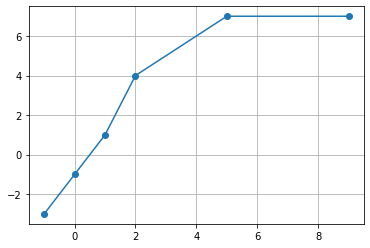

In [16]:
# Declare model inputs and outputs for training
xs = torch.Tensor([-1.0,  0.0, 1.0, 2.0, 5.0, 9.0])
ys = torch.Tensor([-3.0, -1.0, 1.0, 4.0, 7.0, 7.0])

plt.plot(xs,ys, marker='o')
plt.grid()

In [17]:
# Prepare arrays to be loaded as training data
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
from torch.utils.data import DataLoader

# Create simple dataset
dataset = torch.utils.data.TensorDataset(xs, ys)

# Create a dataloader
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get some random data
next(iter(train_dataloader))

[tensor([1.]), tensor([1.])]

In [18]:
model.to(device)

# Fit the model
num_epochs = 250

# Iterate over #epochs
for epoch in range(num_epochs):
    # Visit each data sample once (random)
    for batch, (x,y) in enumerate(train_dataloader): 
        # Compute model prediction and loss
        pred = model(x.to(device))
        loss = MSEloss(pred, y.to(device))
        
        # Backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()       
        
    if epoch % 10 == 0:
        print("Training epoch {}".format(epoch))

Training epoch 0
Training epoch 10
Training epoch 20
Training epoch 30
Training epoch 40
Training epoch 50
Training epoch 60
Training epoch 70
Training epoch 80
Training epoch 90
Training epoch 100
Training epoch 110
Training epoch 120
Training epoch 130
Training epoch 140
Training epoch 150
Training epoch 160
Training epoch 170
Training epoch 180
Training epoch 190
Training epoch 200
Training epoch 210
Training epoch 220
Training epoch 230
Training epoch 240


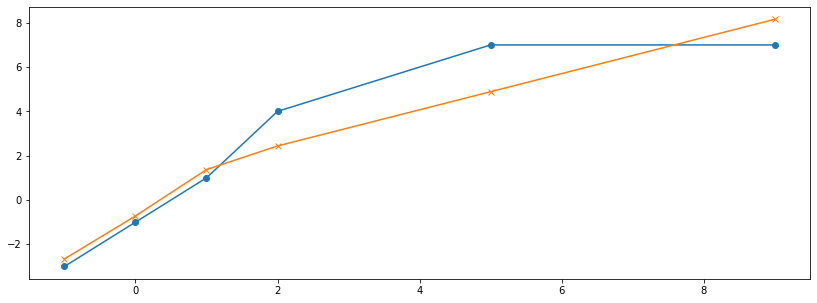

In [19]:
yh = model(xs.to(device).unsqueeze(dim=1)).cpu().detach()

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

In [20]:
# Repeat training * 4
model.to(device)

# Fit the model
num_epochs = 250*4

# Iterate over #epochs
for epoch in range(num_epochs):
    # Visit each data sample once (random)
    for batch, (x,y) in enumerate(train_dataloader): 
        # Compute model prediction and loss
        pred = model(x.to(device))
        loss = MSEloss(pred, y.to(device))
        
        # Backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()       
        
    if epoch % 10 == 0:
        print("Training epoch {}".format(epoch))

Training epoch 0
Training epoch 10
Training epoch 20
Training epoch 30
Training epoch 40
Training epoch 50
Training epoch 60
Training epoch 70
Training epoch 80
Training epoch 90
Training epoch 100
Training epoch 110
Training epoch 120
Training epoch 130
Training epoch 140
Training epoch 150
Training epoch 160
Training epoch 170
Training epoch 180
Training epoch 190
Training epoch 200
Training epoch 210
Training epoch 220
Training epoch 230
Training epoch 240
Training epoch 250
Training epoch 260
Training epoch 270
Training epoch 280
Training epoch 290
Training epoch 300
Training epoch 310
Training epoch 320
Training epoch 330
Training epoch 340
Training epoch 350
Training epoch 360
Training epoch 370
Training epoch 380
Training epoch 390
Training epoch 400
Training epoch 410
Training epoch 420
Training epoch 430
Training epoch 440
Training epoch 450
Training epoch 460
Training epoch 470
Training epoch 480
Training epoch 490
Training epoch 500
Training epoch 510
Training epoch 520
Trai

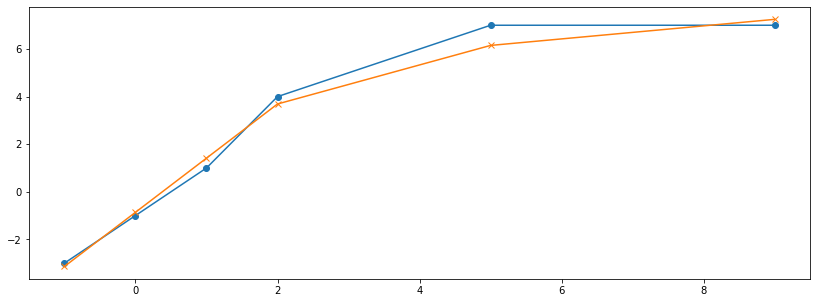

In [21]:
yh = model(xs.to(device).unsqueeze(dim=1)).cpu().detach()

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

In [22]:
# Repeat training * 10
model.to(device)

# Fit the model
num_epochs = 250*10

# Iterate over #epochs
for epoch in range(num_epochs):
    # Visit each data sample once (random)
    for batch, (x,y) in enumerate(train_dataloader): 
        # Compute model prediction and loss
        pred = model(x.to(device))
        loss = MSEloss(pred, y.to(device))
        
        # Backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()       
        
    if epoch % 10 == 0:
        print("Training epoch {}".format(epoch))


Training epoch 0
Training epoch 10
Training epoch 20
Training epoch 30
Training epoch 40
Training epoch 50
Training epoch 60
Training epoch 70
Training epoch 80
Training epoch 90
Training epoch 100
Training epoch 110
Training epoch 120
Training epoch 130
Training epoch 140
Training epoch 150
Training epoch 160
Training epoch 170
Training epoch 180
Training epoch 190
Training epoch 200
Training epoch 210
Training epoch 220
Training epoch 230
Training epoch 240
Training epoch 250
Training epoch 260
Training epoch 270
Training epoch 280
Training epoch 290
Training epoch 300
Training epoch 310
Training epoch 320
Training epoch 330
Training epoch 340
Training epoch 350
Training epoch 360
Training epoch 370
Training epoch 380
Training epoch 390
Training epoch 400
Training epoch 410
Training epoch 420
Training epoch 430
Training epoch 440
Training epoch 450
Training epoch 460
Training epoch 470
Training epoch 480
Training epoch 490
Training epoch 500
Training epoch 510
Training epoch 520
Trai

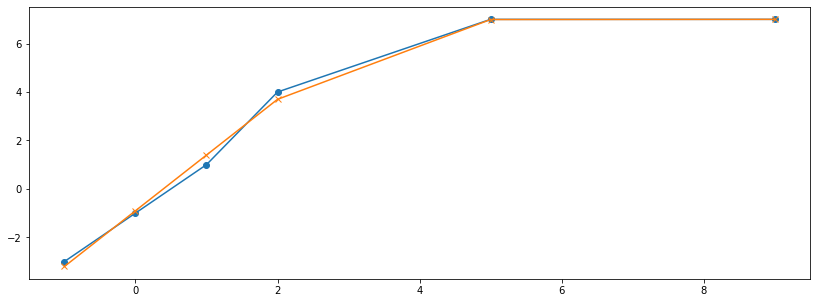

In [23]:
yh = model(xs.to(device).unsqueeze(dim=1)).cpu().detach()

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

# References

To learn more, refer to:

- <a href="https://www.oreilly.com/library/view/programming-pytorch-for/9781492045342/" class="external">Programming PyTorch for Deep Learning</a>.


## The END